In [1]:
%pylab inline
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.interpolate import interp1d

from astropy.coordinates import SkyCoord, EarthLocation
from astral import sun
APACHE = EarthLocation.of_site('Apache Point')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
import astral

In [16]:
plt.rc('font', size=16, family='serif')

In [5]:
image_list = pd.read_csv('boss_image_list.csv')

In [6]:
good = image_list[image_list['PLATEQUALITY'] == 'good']

In [7]:
good[good.IMG_NUM == 135458]

,PLATE,MJD,IMG_NAME,IMG_NUM,PLATEQUALITY
0,5290,55862,b1-00135458,135458,good
9,5290,55862,b2-00135458,135458,good
18,5290,55862,r1-00135458,135458,good
27,5290,55862,r2-00135458,135458,good


In [216]:
len(np.unique(good.PLATE))

2438

In [217]:
len(np.unique(good.IMG_NUM))

13062

## Get all Rich Meta Data

In [8]:
rich_meta_dir = '/global/cscratch1/sd/parkerf/dark_boss_sky/rich_meta/'

In [9]:
Meta = []
rich_files = os.listdir(rich_meta_dir)
for f in rich_files:
    try:
        df = pd.read_csv(rich_meta_dir + f)
        Meta.append(df)
    except:
        print(f)

In [10]:
Meta = pd.concat(Meta)

In [10]:
Meta.head()

,PLATE,SPECNO,IMG,FIB,XFOCAL,YFOCAL,FIBER_RA,FIBER_DEC,OBJTYPE,MJD,TAI-BEG,TAI-END,RA,DEC,CAMERAS,AIRMASS,ALT,AZ,EXPTIME,SEEING20,SEEING50,SEEING80,RMSOFF20,RMSOFF50,RMSOFF80,DATE-OBS,REDDEN01,REDDEN02,REDDEN03,REDDEN04,REDDEN05,QUALITY,DUSTC,DUSTD,AIRTEMP,DEWPOINT,DUSTA,DUSTB,GUSTD,GUSTS,HUMIDITY,PRESSURE,WINDD,WINDS,OBS_ZENITH,ECL_LAT,ECL_LON,GAL_LAT,GAL_LON,ZODI,ISL,MOOND,MOON_SEP,MOON_ALT,MOON_AZ,MOON_ZENITH,MOON_PHASE,SUN_SEP,SUN_ALT,SUN_AZ,SUN_MOON_SEP,MONTH,PHOTO,SOLARFLUX
0,5375,0,139856,6,292.29485,-66.910493,175.22116,9.441183,SKY,55973,4.836097e+09,4.836098e+09,173.863127,9.751595,b1,1.0929,65.574,21.058,900.86,1.4781,1.5707,1.6627,0.010105,0.01673,0.02617,2012-02-16T08:22:16,0.1849,0.1361,0.0987,0.0748,0.0531,excellent,-1.0,-1.0,-2.7,-9.5,17998.0,1341.0,188.6,14.7,55.6,21.396,185.6,13.0,24.426,6.515708,170.49452,65.038698,253.450954,4.800391,1.453083,375852.554614,88.413173,-12.84423,108.998443,102.84423,22.744556,155.554211,-63.890484,43.160219,67.960722,2,0.0,104.408165
1,5375,1,139856,24,246.75249,-125.213990,175.00897,9.174277,SKY,55973,4.836097e+09,4.836098e+09,173.863127,9.751595,b1,1.0929,65.574,21.058,900.86,1.4781,1.5707,1.6627,0.010105,0.01673,0.02617,2012-02-16T08:22:16,0.1849,0.1361,0.0987,0.0748,0.0531,excellent,-1.0,-1.0,-2.7,-9.5,17998.0,1341.0,188.6,14.7,55.6,21.396,185.6,13.0,24.426,6.515708,170.49452,65.038698,253.450954,4.800391,1.453083,375852.554614,88.413173,-12.84423,108.998443,102.84423,22.744556,155.554211,-63.890484,43.160219,67.960722,2,0.0,104.408165
2,5375,2,139856,30,244.41818,-86.143672,174.99895,9.353515,SKY,55973,4.836097e+09,4.836098e+09,173.863127,9.751595,b1,1.0929,65.574,21.058,900.86,1.4781,1.5707,1.6627,0.010105,0.01673,0.02617,2012-02-16T08:22:16,0.1849,0.1361,0.0987,0.0748,0.0531,excellent,-1.0,-1.0,-2.7,-9.5,17998.0,1341.0,188.6,14.7,55.6,21.396,185.6,13.0,24.426,6.515708,170.49452,65.038698,253.450954,4.800391,1.453083,375852.554614,88.413173,-12.84423,108.998443,102.84423,22.744556,155.554211,-63.890484,43.160219,67.960722,2,0.0,104.408165
3,5375,3,139856,52,226.54699,-199.449980,174.91355,8.834334,SKY,55973,4.836097e+09,4.836098e+09,173.863127,9.751595,b1,1.0929,65.574,21.058,900.86,1.4781,1.5707,1.6627,0.010105,0.01673,0.02617,2012-02-16T08:22:16,0.1849,0.1361,0.0987,0.0748,0.0531,excellent,-1.0,-1.0,-2.7,-9.5,17998.0,1341.0,188.6,14.7,55.6,21.396,185.6,13.0,24.426,6.515708,170.49452,65.038698,253.450954,4.800391,1.453083,375852.554614,88.413173,-12.84423,108.998443,102.84423,22.744556,155.554211,-63.890484,43.160219,67.960722,2,0.0,104.408165
4,5375,4,139856,58,222.37757,-167.478040,174.89507,8.980705,SKY,55973,4.836097e+09,4.836098e+09,173.863127,9.751595,b1,1.0929,65.574,21.058,900.86,1.4781,1.5707,1.6627,0.010105,0.01673,0.02617,2012-02-16T08:22:16,0.1849,0.1361,0.0987,0.0748,0.0531,excellent,-1.0,-1.0,-2.7,-9.5,17998.0,1341.0,188.6,14.7,55.6,21.396,185.6,13.0,24.426,6.515708,170.49452,65.038698,253.450954,4.800391,1.453083,375852.554614,88.413173,-12.84423,108.998443,102.84423,22.744556,155.554211,-63.890484,43.160219,67.960722,2,0.0,104.408165


In [11]:
Meta.columns

Index(['PLATE', 'SPECNO', 'IMG', 'FIB', 'XFOCAL', 'YFOCAL', 'FIBER_RA',
       'FIBER_DEC', 'OBJTYPE', 'MJD', 'TAI-BEG', 'TAI-END', 'RA', 'DEC',
       'CAMERAS', 'AIRMASS', 'ALT', 'AZ', 'EXPTIME', 'SEEING20', 'SEEING50',
       'SEEING80', 'RMSOFF20', 'RMSOFF50', 'RMSOFF80', 'DATE-OBS', 'REDDEN01',
       'REDDEN02', 'REDDEN03', 'REDDEN04', 'REDDEN05', 'QUALITY', 'DUSTC',
       'DUSTD', 'AIRTEMP', 'DEWPOINT', 'DUSTA', 'DUSTB', 'GUSTD', 'GUSTS',
       'HUMIDITY', 'PRESSURE', 'WINDD', 'WINDS', 'OBS_ZENITH', 'ECL_LAT',
       'ECL_LON', 'GAL_LAT', 'GAL_LON', 'ZODI', 'ISL', 'MOOND', 'MOON_SEP',
       'MOON_ALT', 'MOON_AZ', 'MOON_ZENITH', 'MOON_PHASE', 'SUN_SEP',
       'SUN_ALT', 'SUN_AZ', 'SUN_MOON_SEP', 'MONTH', 'PHOTO', 'SOLARFLUX'],
      dtype='object')

In [11]:
Dark = Meta[(Meta.AIRMASS < 1.4) & (Meta.GAL_LAT > 10) & (Meta.SUN_ALT < -15) & (Meta.MOON_ALT < 0)]

In [14]:
len(Meta)

2469563

In [15]:
len(Dark)

1319202

In [12]:
from astropy.time import Time
def get_year_from_mjd(mjd):
    tt = Time(mjd, format='mjd')
    return tt.decimalyear

In [13]:
yeardate = get_year_from_mjd(Meta['MJD'])
dark_yeardata = get_year_from_mjd(Dark['MJD'])

In [14]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

(2009.5, 2014.6)

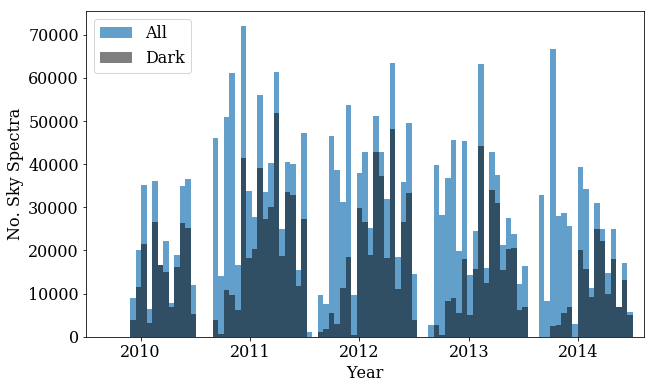

In [17]:
fig, ax1 = plt.subplots(1, figsize=(10,6))
bins = numpy.linspace(2009.5, 2014.5, 100)
ax1.hist(yeardate, bins = bins, alpha = 0.7, label = 'All')
ax1.hist(dark_yeardata, bins = bins, color = 'k', alpha = 0.5, label = 'Dark')
ax1.legend()
ax1.set_ylabel("No. Sky Spectra")
ax1.set_xlabel("Year")
ax1.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax1.set_xlim([2009.5,2014.6])

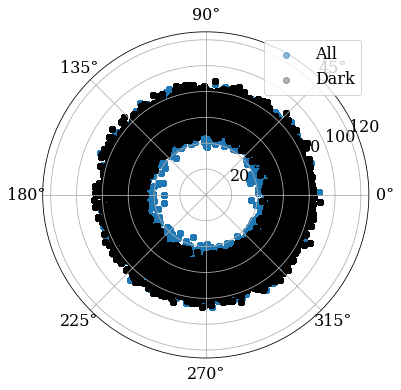

In [24]:
fig, plt.figure(figsize = (10,6),)
T = Meta[Meta['ALT']>0]
ax1 = plt.subplot(111, projection='polar')

ax1.scatter(T['AZ'],T['ALT'],alpha = 0.5,label='All')
ax1.scatter(Dark['AZ'],Dark['ALT'],  alpha=0.3, color = 'k', label = "Dark")
ax1.legend(loc='upper right')
#ax2 = ax1.twinx()
#mn,mx = ax1.get_ylim()
#print(mn,mx)
#ax2.set_yticks([mx,mx*0.5,mx*(1/6.),mx*0.1])
#ax2.set_yticklabels(['1.0','1.2','1.6','1.8'])

#ax1.set_xlabel("Azimuth (deg.)")
#ax1.set_ylabel("Altitude (deg.)")
#ax2.set_ylabel("Airmass")

#ax1.legend(loc='upper right')

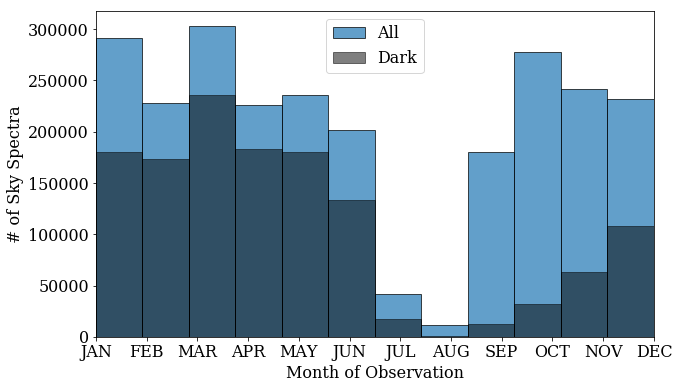

In [25]:
plt.figure(figsize = (10,6))
ret = plt.hist(Meta['MONTH'],bins=12,edgecolor='black',alpha=0.7,label='All')
ret = plt.hist(Dark['MONTH'],bins=12,alpha = 0.5, color = 'black',  edgecolor='black', label = 'Dark')
months = ['','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
plt.xticks(np.linspace(0,12,13),months)
plt.xlim(1,12)
plt.xlabel('Month of Observation')
plt.ylabel ('# of Sky Spectra')
plt.legend()

## Add Data to DataFrame

In [27]:
apache = astral.Observer(APACHE.lat.value, APACHE.lon.value, APACHE.height.value)

In [29]:
obs_time = 0.5*((Meta['TAI-BEG']+Meta['TAI-END'])/86400.)
start_time = Time(obs_time, scale='tai', format='mjd', location=APACHE)

In [146]:
sun_rise = [Time(astral.sun.sun(apache, Time(t,scale='tai',format='mjd').datetime)['sunrise'], scale='utc') for t in Dark['MJD']]

In [30]:
sun_set = [Time(astral.sun.sun(apache, (Time(t,scale='tai',format='mjd').datetime - timedelta(days=1)))['sunset'], scale='utc') for t in Meta['MJD']]

In [160]:
Dark['SUN_RISE'] = sun_rise
Dark['SUN_SET'] = sun_set

/global/homes/p/parkerf/.conda/envs/myjupkernel/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/global/homes/p/parkerf/.conda/envs/myjupkernel/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [162]:
Dark['HOUR_FRAC'] = [(start_time[i] - x)/(sun_rise[i] - x) for i, x in enumerate(sun_set)]

/global/homes/p/parkerf/.conda/envs/myjupkernel/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [163]:
Dark['MONTH'] = [time.datetime.month for time in start_time]

/global/homes/p/parkerf/.conda/envs/myjupkernel/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [164]:
Dark.to_csv('dark_meta_all_0402.csv',index=False)

In [166]:
np.unique(Dark['MONTH'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [128]:
months = {1.:'JAN',2.:'FEB',3.:'MAR',4.:'APR',5.:'MAY',6.:'JUN',7.:'JUL',8.:'AUG',9.:'SEP',10.:'OCT',11.:'NOV',12.:'DCM'}
for month in months.values():
    Meta[month] = 0

In [130]:
np.unique(np.floor(list(Meta.MONTH_FRAC)))

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.])

In [168]:
month_landed = [months[x] for x in list(Dark.MONTH)]

In [170]:
Dark.reset_index(inplace=True, drop=True)

In [173]:
for ix in Dark.index:
    Dark.at[ix, month_landed[ix]] = 1

In [181]:
Dark.columns

Index(['PLATE', 'SPECNO', 'IMG', 'FIB', 'XFOCAL', 'YFOCAL', 'FIBER_RA',
       'FIBER_DEC', 'OBJTYPE', 'MJD', 'TAI-BEG', 'TAI-END', 'RA', 'DEC',
       'CAMERAS', 'AIRMASS', 'ALT', 'AZ', 'EXPTIME', 'SEEING20', 'SEEING50',
       'SEEING80', 'RMSOFF20', 'RMSOFF50', 'RMSOFF80', 'DATE-OBS', 'REDDEN01',
       'REDDEN02', 'REDDEN03', 'REDDEN04', 'REDDEN05', 'QUALITY', 'DUSTC',
       'DUSTD', 'AIRTEMP', 'DEWPOINT', 'DUSTA', 'DUSTB', 'GUSTD', 'GUSTS',
       'HUMIDITY', 'PRESSURE', 'WINDD', 'WINDS', 'OBS_ZENITH', 'ECL_LAT',
       'ECL_LON', 'GAL_LAT', 'GAL_LON', 'ZODI', 'ISL', 'MOOND', 'MOON_SEP',
       'MOON_ALT', 'MOON_AZ', 'MOON_ZENITH', 'MOON_PHASE', 'SUN_SEP',
       'SUN_ALT', 'SUN_AZ', 'SUN_MOON_SEP', 'MONTH', 'PHOTO', 'SOLARFLUX',
       'HOUR', 'SUN_RISE', 'SUN_SET', 'MONTH_FRAC', 'JAN', 'FEB', 'MAR', 'APR',
       'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'HOUR_FRAC', 'H1',
       'H2', 'H3', 'H4', 'H5', 'H6'],
      dtype='object')

In [180]:
hours = ['H1','H2','H3','H4','H5','H6']
for hour in hours:
    Dark[hour] = 0

/global/homes/p/parkerf/.conda/envs/myjupkernel/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [193]:
hour_segment = [hours[np.where(levels>=h)[0][0]-1] for h in Dark.HOUR_FRAC]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [203]:
hours = np.array(['H1','H2','H3','H4','H5','H6'])
hour_segment = []
for h in Dark.HOUR_FRAC:
    try:
        x = np.where((levels>=h))[0][0]-1
        hour_segment.append(hours[x])
    except:
        hour_segment.append(np.nan)

In [208]:
for ix in Dark.index:
    try:
        Dark.at[ix, hour_segment[ix]] = 1
    except:
        pass

In [ ]:
Dark.to_csv('dark_meta_all.csv',index=False)

In [53]:
Dark = Meta[(Meta.AIRMASS < 1.4) & (Meta.GAL_LAT > 10) & (Meta.SUN_ALT < -15) & (Meta.MOON_ALT < 0)]

In [37]:
np.unique(Dark[Dark['HOUR'] >13].HOUR)

array([ 601.78178339,  601.90188494])

In [26]:
plt.figure(figsize = (10,6))
bins = np.linspace(0,12,13)
these_hours = Meta[Meta['HOUR'] < 500]['HOUR']
dark_hours = Dark[Dark['HOUR'] < 500]['HOUR']
ret = plt.hist(these_hours,bins=bins,edgecolor='black',alpha=0.7,label='_nolegend_')
ret = plt.hist(dark_hours,bins=bins,color='balck',alpha=0.5,edgecolor='black',label='Dark')
#ret = plt.hist(Dark['HOUR'],bins=12,color='darkorange',edgecolor='black',label = 'Dark')
#months = ['','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
#plt.xticks(np.linspace(0,12,13),months)
plt.xlim(1,12)
plt.xlabel("Time of Observation (hours after sunset)")
plt.ylabel ('# of Sky Spectra')
plt.legend()

KeyError: 'HOUR'

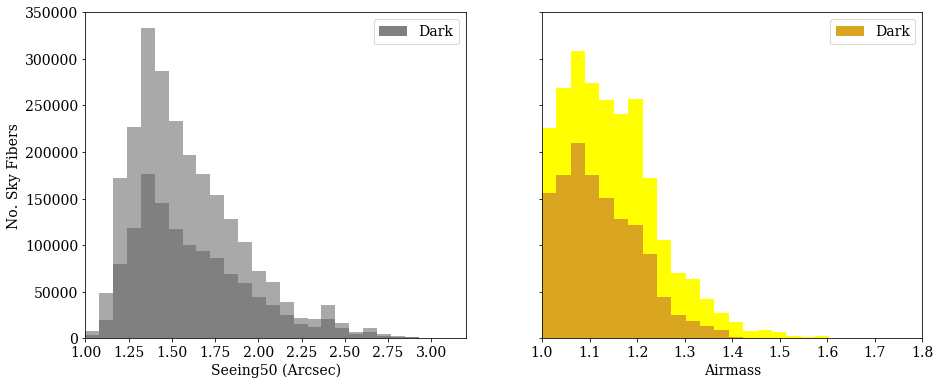

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6),sharey = True)
MF_seeing = Meta[Meta['SEEING50']>0]
bins = np.linspace(min(MF_seeing['SEEING50']),max(MF_seeing['SEEING50']),50)
bins1 = np.linspace(min(MF_seeing['AIRMASS']),max(MF_seeing['AIRMASS']),30)
ax1.hist(MF_seeing['SEEING50'],bins=bins, color = 'darkgrey',label='_nolegend_') #"Mean: %.2f" % np.mean(MF_seeing['SEEING50']))
ax1.hist(Dark['SEEING50'],bins=bins, color = 'grey',label = 'Dark') #"Mean: %.2f" % np.mean(MF_seeing['SEEING50']))
ax2.hist(MF_seeing['AIRMASS'],bins=bins1,color = 'yellow',label='_nolegend_')#"Mean: %.2f" % np.mean(MF_mean['AIRMASS']))
ax2.hist(Dark['AIRMASS'],bins=bins1,color = 'goldenrod',label = 'Dark')#"Mean: %.2f" % np.mean(MF_mean['AIRMASS']))
ax1.set_xlabel("Seeing50 (Arcsec)")
ax2.set_xlabel( "Airmass")
ax1.set_ylabel("No. Sky Fibers")
ax1.legend()
ax2.legend()
ax1.set_xlim(1, 3.2)
ax2.set_xlim(1,1.8)
ax1.legend()
ax2.legend()

(array([  1.08532000e+05,   0.00000000e+00,   1.06430900e+06,
          9.99866000e+05,   2.42256000e+05,   3.76340000e+04,
          6.56000000e+02,   0.00000000e+00,   0.00000000e+00,
          3.10000000e+02]),
 array([ 0.     ,  0.49326,  0.98652,  1.47978,  1.97304,  2.4663 ,
         2.95956,  3.45282,  3.94608,  4.43934,  4.9326 ]),
 <a list of 10 Patch objects>)

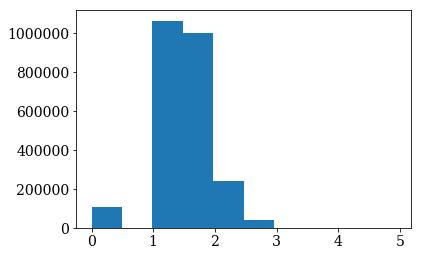

In [76]:
plt.hist(Meta['SEEING50'])

## How Many Dark Observations?

In [54]:
len(np.unique(Dark.PLATE))

1561

In [55]:
len(np.unique(Dark.IMG))

7114

In [56]:
len(Dark)/2.

659601.0

In [19]:
big_files = [3647, 6782, 3615, 6781, 7339, 7260, 7262, 5745, 4052, 5705]

In [20]:
for plate in np.unique(Dark.PLATE):
    if plate in big_files:
        print(plate)

4052
5745
7339


In [57]:
Dark.to_csv('dark_meta_all.csv',index=False)

## Make Mean Meta File for each camera

In [40]:
Dark[['PLATE','IMG']].to_csv('dark_images.csv',index=False)

In [212]:
Dark.head()

,PLATE,SPECNO,IMG,FIB,XFOCAL,YFOCAL,FIBER_RA,FIBER_DEC,OBJTYPE,MJD,TAI-BEG,TAI-END,RA,DEC,CAMERAS,AIRMASS,ALT,AZ,EXPTIME,SEEING20,SEEING50,SEEING80,RMSOFF20,RMSOFF50,RMSOFF80,DATE-OBS,REDDEN01,REDDEN02,REDDEN03,REDDEN04,REDDEN05,QUALITY,DUSTC,DUSTD,AIRTEMP,DEWPOINT,DUSTA,DUSTB,GUSTD,GUSTS,HUMIDITY,PRESSURE,WINDD,WINDS,OBS_ZENITH,ECL_LAT,ECL_LON,GAL_LAT,GAL_LON,ZODI,ISL,MOOND,MOON_SEP,MOON_ALT,MOON_AZ,MOON_ZENITH,MOON_PHASE,SUN_SEP,SUN_ALT,SUN_AZ,SUN_MOON_SEP,MONTH,PHOTO,SOLARFLUX,HOUR,SUN_RISE,SUN_SET,MONTH_FRAC,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,HOUR_FRAC,H1,H2,H3,H4,H5,H6
0,5375,0,139856,6,292.29485,-66.910493,175.22116,9.441183,SKY,55973,4.836097e+09,4.836098e+09,173.863127,0,b1,1.0929,65.574,21.058,900.86,1.4781,1.5707,1.6627,0.010105,0.01673,0.02617,2012-02-16T08:22:16,0.1849,0.1361,0.0987,0.0748,0.0531,excellent,-1.0,-1.0,-2.7,-9.5,17998.0,1341.0,188.6,14.7,55.6,21.396,185.6,13.0,24.426,6.515708,170.49452,65.038698,253.450954,4.800391,1.453083,375852.554614,88.413173,-12.84423,108.998443,102.84423,22.744556,155.554211,-63.890484,43.160219,67.960722,2,0.0,104.408165,7.632262,2012-02-16 13:43:02.852025,2012-02-16 00:51:16.288370,2.533333,0,1,0,0,0,0,0,0,0,0,0,0.5933530683641632,0,0,0,1,0,0
1,5375,1,139856,24,246.75249,-125.213990,175.00897,9.174277,SKY,55973,4.836097e+09,4.836098e+09,173.863127,0,b1,1.0929,65.574,21.058,900.86,1.4781,1.5707,1.6627,0.010105,0.01673,0.02617,2012-02-16T08:22:16,0.1849,0.1361,0.0987,0.0748,0.0531,excellent,-1.0,-1.0,-2.7,-9.5,17998.0,1341.0,188.6,14.7,55.6,21.396,185.6,13.0,24.426,6.515708,170.49452,65.038698,253.450954,4.800391,1.453083,375852.554614,88.413173,-12.84423,108.998443,102.84423,22.744556,155.554211,-63.890484,43.160219,67.960722,2,0.0,104.408165,7.632262,2012-02-16 13:43:02.852025,2012-02-16 00:51:16.288370,2.533333,0,1,0,0,0,0,0,0,0,0,0,0.5933530683641632,0,0,0,1,0,0
2,5375,2,139856,30,244.41818,-86.143672,174.99895,9.353515,SKY,55973,4.836097e+09,4.836098e+09,173.863127,0,b1,1.0929,65.574,21.058,900.86,1.4781,1.5707,1.6627,0.010105,0.01673,0.02617,2012-02-16T08:22:16,0.1849,0.1361,0.0987,0.0748,0.0531,excellent,-1.0,-1.0,-2.7,-9.5,17998.0,1341.0,188.6,14.7,55.6,21.396,185.6,13.0,24.426,6.515708,170.49452,65.038698,253.450954,4.800391,1.453083,375852.554614,88.413173,-12.84423,108.998443,102.84423,22.744556,155.554211,-63.890484,43.160219,67.960722,2,0.0,104.408165,7.632262,2012-02-16 13:43:02.852025,2012-02-16 00:51:16.288370,2.533333,0,1,0,0,0,0,0,0,0,0,0,0.5933530683641632,0,0,0,1,0,0
3,5375,3,139856,52,226.54699,-199.449980,174.91355,8.834334,SKY,55973,4.836097e+09,4.836098e+09,173.863127,0,b1,1.0929,65.574,21.058,900.86,1.4781,1.5707,1.6627,0.010105,0.01673,0.02617,2012-02-16T08:22:16,0.1849,0.1361,0.0987,0.0748,0.0531,excellent,-1.0,-1.0,-2.7,-9.5,17998.0,1341.0,188.6,14.7,55.6,21.396,185.6,13.0,24.426,6.515708,170.49452,65.038698,253.450954,4.800391,1.453083,375852.554614,88.413173,-12.84423,108.998443,102.84423,22.744556,155.554211,-63.890484,43.160219,67.960722,2,0.0,104.408165,7.632262,2012-02-16 13:43:02.852025,2012-02-16 00:51:16.288370,2.533333,0,1,0,0,0,0,0,0,0,0,0,0.5933530683641632,0,0,0,1,0,0
4,5375,4,139856,58,222.37757,-167.478040,174.89507,8.980705,SKY,55973,4.836097e+09,4.836098e+09,173.863127,0,b1,1.0929,65.574,21.058,900.86,1.4781,1.5707,1.6627,0.010105,0.01673,0.02617,2012-02-16T08:22:16,0.1849,0.1361,0.0987,0.0748,0.0531,excellent,-1.0,-1.0,-2.7,-9.5,17998.0,1341.0,188.6,14.7,55.6,21.396,185.6,13.0,24.426,6.515708,170.49452,65.038698,253.450954,4.800391,1.453083,375852.554614,88.413173,-12.84423,108.998443,102.84423,22.744556,155.554211,-63.890484,43.160219,67.960722,2,0.0,104.408165,7.632262,2012-02-16 13:43:02.852025,2012-02-16 00:51:16.288370,2.533333,0,1,0,0,0,0,0,0,0,0,0,0.5933530683641632,0,0,0,1,0,0


In [213]:
DD = {}
for camera in np.unique(Dark.CAMERAS):
    d = Dark[Dark.CAMERAS == camera]
    d = d.drop(['SPECNO','FIB', 'XFOCAL', 'YFOCAL', 'FIBER_RA','FIBER_DEC','ISL','SUN_RISE','SUN_SET'],axis=1)
    d.drop_duplicates(inplace=True)
    DD[camera] = d

In [214]:
len(DD['b1'])

7114

In [215]:
len(np.unique(DD['b1'].IMG))

7114

In [216]:
#Redo ISL
import pickle
isl_data = pickle.load(open(os.getcwd()+'/util/isl_map.pkl','rb'))
for cam, df in DD.items():
    l_b = np.array(df[['GAL_LON','GAL_LAT']])
    df['ISL'] = [isl_data(x[0],x[1])[0] for x in l_b]

In [218]:
for cam, df in DD.items():
    print(cam, len(df))
    df.reset_index(inplace=True)
    df.to_csv('dark_meta_%s.csv'%cam, index=False)

b1 7114
b2 7113
r1 7114
r2 7113


## Photometric Conditions

In [55]:
Dark.groupby(['PHOTO']).count()

,PLATE,SPECNO,IMG,FIB,XFOCAL,YFOCAL,FIBER_RA,FIBER_DEC,OBJTYPE,MJD,...,MOON_AZ,MOON_ZENITH,MOON_PHASE,SUN_SEP,SUN_ALT,SUN_AZ,SUN_MOON_SEP,MONTH,SOLARFLUX,HOUR
PHOTO,,,,,,,,,,,,,,,,,,,,,
0.0,784574,784574,784574,784574,784574,784574,784574,784574,784574,784574,...,784574,784574,784574,784574,784574,784574,784574,784574,784574,784574
0.5,20532,20532,20532,20532,20532,20532,20532,20532,20532,20532,...,20532,20532,20532,20532,20532,20532,20532,20532,20532,20532
1.0,501456,501456,501456,501456,501456,501456,501456,501456,501456,501456,...,501456,501456,501456,501456,501456,501456,501456,501456,501456,501456


In [62]:
Dark.groupby(['IMG','PHOTO'], as_index=False).count().groupby('PHOTO').count()

,IMG,PLATE,SPECNO,FIB,XFOCAL,YFOCAL,FIBER_RA,FIBER_DEC,OBJTYPE,MJD,...,MOON_AZ,MOON_ZENITH,MOON_PHASE,SUN_SEP,SUN_ALT,SUN_AZ,SUN_MOON_SEP,MONTH,SOLARFLUX,HOUR
PHOTO,,,,,,,,,,,,,,,,,,,,,
0.0,4227,4227,4227,4227,4227,4227,4227,4227,4227,4227,...,4227,4227,4227,4227,4227,4227,4227,4227,4227,4227
0.5,114,114,114,114,114,114,114,114,114,114,...,114,114,114,114,114,114,114,114,114,114
1.0,2694,2694,2694,2694,2694,2694,2694,2694,2694,2694,...,2694,2694,2694,2694,2694,2694,2694,2694,2694,2694


In [63]:
2694/4227

0.6373314407381121

In [64]:
tot = 4227 + 114 + 2694

In [65]:
114/tot

0.0162046908315565

In [66]:
2694/tot

0.3829424307036247

In [67]:
4227/tot

0.6008528784648187

In [68]:
photo = Dark[Dark['PHOTO'] == 1.0]
non_photo = Dark[Dark['PHOTO'] == 0.0]

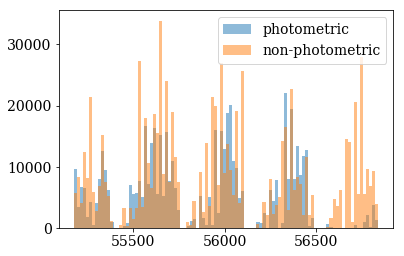

In [75]:
plt.hist(photo['MJD'],bins=100, alpha = 0.5, label = 'photometric')
plt.hist(non_photo['MJD'], bins=100,alpha=0.5, label = 'non-photometric')
plt.legend()

## Calibration Vector

In [86]:
Dark[(Dark.AIRMASS < 1.1) & (Dark.SEEING50 < 1.1) & (Dark.SEEING50 > 0)][['PLATE','IMG','AIRMASS','SEEING50']].drop_duplicates()

,PLATE,IMG,AIRMASS,SEEING50
0,3927,115504,1.05963,1.0881
37,3927,115505,1.05133,1.0866
74,3927,115506,1.04795,1.0472
111,3927,115507,1.04926,1.0451
98,5775,141568,1.01360,1.0799
0,6438,158303,1.02128,1.0849
41,3763,121821,1.02799,1.0436
0,3985,114434,1.00434,1.0881
49,3985,114435,1.00056,1.0746
98,3985,114439,1.00396,1.0391


## Check Mean Spectra

Calibrated Sky files have the spectra for all Images in a Dark Plate. Let's double check

In [20]:
dir = '/global/cscratch1/sd/parkerf/dark_boss_sky/calibrated_sky'

In [21]:
plates = [int(f[0:4]) for f in os.listdir(dir)]

In [22]:
for plate in plates:
    if plate not in np.unique(Dark.PLATE):
        print(plate)for plate in plates:
    if plate not in np.unique(Dark.PLATE):
        print(plate)

In [23]:
for plate in np.unique(Dark.PLATE):
    if plate not in plates:
        print(plate)

In [24]:
len(np.unique(Dark.PLATE))

1561

In [25]:
len(plates)

1561

Now, check that all Dark Images have all 4 cameras in Mean images

In [26]:
dir = '/global/cscratch1/sd/parkerf/dark_boss_sky/mean_spectra/'

In [27]:
folders = os.listdir(dir)

In [28]:
for plate in plates:
    if str(plate) not in folders:
        print(plate)

In [29]:
not_finished = []
for plate in folders:
    imgs = np.unique(Dark[Dark.PLATE == int(plate)].IMG)
    for img in imgs:
        files = glob.glob(dir+plate+'/%s*.csv' % img)
        if len(files) < 4:
            not_finished.append([plate, img, len(files)])

In [30]:
not_finished

[]

In [31]:
len(np.unique(Dark[Dark.PLATE == 7339].IMG))

128

In [32]:
not_dark = []
for plate in folders:
    files = glob.glob(dir+plate+'/*.csv')
    imgs = np.unique([int(os.path.split(f)[1][0:6]) for f in files])
    dark_images = np.unique(Dark[Dark.PLATE == int(plate)].IMG)
    for img in imgs:
        if img not in dark_images:
            not_dark.append(img)

In [33]:
not_dark

[]

Now check that all new cont files are there

In [34]:
dir = '/global/cscratch1/sd/parkerf/dark_boss_sky/mean_cont_spectra/'

In [35]:
folders = os.listdir(dir)

In [36]:
for plate in plates:
    if str(plate) not in folders:
        print(plate)

In [37]:
not_found = []
for plate in folders:
    imgs = np.unique(Dark[Dark.PLATE == int(plate)].IMG)
    for img in imgs:
        for cam in ['b1','b2','r1','r2']:
            fn = dir+plate+'/%s_%s.csv' % (img, cam)
            f = glob.glob(fn)
            if len(f) == 0:
                not_found.append(fn)

In [38]:
not_found

['/global/cscratch1/sd/parkerf/dark_boss_sky/mean_cont_spectra/3956/129281_b2.csv',
 '/global/cscratch1/sd/parkerf/dark_boss_sky/mean_cont_spectra/4753/129938_b1.csv',
 '/global/cscratch1/sd/parkerf/dark_boss_sky/mean_cont_spectra/4490/127621_b1.csv',
 '/global/cscratch1/sd/parkerf/dark_boss_sky/mean_cont_spectra/7108/173768_b1.csv']

## Make Zenith Spectra

In [18]:
dark_meta = pd.read_csv('dark_meta_b1.csv')

In [19]:
zenith = dark_meta[(dark_meta.AIRMASS < 1.01) & (dark_meta.SUN_ALT < -18) & (dark_meta.GAL_LAT > 15) & (dark_meta.ECL_LAT > 15) & (dark_meta.PHOTO == 1.0)]

In [20]:
zenith.head()

,index,PLATE,IMG,OBJTYPE,MJD,TAI-BEG,TAI-END,RA,DEC,CAMERAS,AIRMASS,ALT,AZ,EXPTIME,SEEING20,SEEING50,SEEING80,RMSOFF20,RMSOFF50,RMSOFF80,DATE-OBS,REDDEN01,REDDEN02,REDDEN03,REDDEN04,REDDEN05,QUALITY,DUSTC,DUSTD,AIRTEMP,DEWPOINT,DUSTA,DUSTB,GUSTD,GUSTS,HUMIDITY,PRESSURE,WINDD,WINDS,OBS_ZENITH,ECL_LAT,ECL_LON,GAL_LAT,GAL_LON,ZODI,MOOND,MOON_SEP,MOON_ALT,MOON_AZ,MOON_ZENITH,MOON_PHASE,SUN_SEP,SUN_ALT,SUN_AZ,SUN_MOON_SEP,MONTH,PHOTO,SOLARFLUX,HOUR,MONTH_FRAC,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,HOUR_FRAC,H1,H2,H3,H4,H5,H6,ISL
171,33556,5981,156794,SKY,56340,4.867811e+09,4.867812e+09,188.461823,0,b1,1.00453,84.912,-2.219,900.85,1.2573,1.4321,1.5480,0.013418,0.020105,0.027768,2013-02-17T09:49:14,0.0887,0.0652,0.0473,0.0359,0.0254,excellent,-1.0,-1.0,1.8,-24.9,12087.0,1563.0,281.0,12.6,14.9,21.437,265.0,8.9,5.088,28.628914,175.695790,86.046200,202.678725,3.205574,405034.916332,118.506533,-26.242383,316.394537,116.242386,6.800111,141.456165,-48.080835,69.421807,84.570754,2,1.0,104.578995,9.055923,2.566667,0,1,0,0,0,0,0,0,0,0,0,0.707054,0,0,0,0,1,0,0.860625
172,33604,5981,156795,SKY,56340,4.867812e+09,4.867813e+09,188.462369,0,b1,1.00876,83.684,-37.532,900.86,1.1549,1.2004,1.2557,0.013737,0.020769,0.028467,2013-02-17T10:05:36,0.0887,0.0652,0.0473,0.0359,0.0254,excellent,-1.0,-1.0,2.0,-24.6,12245.0,1469.0,264.5,11.2,14.9,21.429,262.8,5.8,6.316,28.629600,175.696014,86.046603,202.670172,3.205530,405280.625612,118.378108,-28.433877,319.792079,118.433876,6.800111,141.462883,-44.823479,72.804951,84.732168,2,1.0,104.578995,9.328702,2.566667,0,1,0,0,0,0,0,0,0,0,0,0.728351,0,0,0,0,1,0,0.860625
243,46942,4610,127357,SKY,55621,4.805683e+09,4.805684e+09,181.644598,0,b1,1.00599,82.053,108.453,900.85,1.5505,1.7068,1.8731,0.007512,0.016677,0.025284,2011-03-01T07:59:04,0.0872,0.0642,0.0465,0.0353,0.0250,excellent,-1.0,-1.0,0.4,-17.3,5533.0,382.0,185.0,21.8,25.2,21.555,183.6,16.9,7.947,32.407951,165.820965,77.577690,170.691724,3.006486,402953.298471,125.900423,-42.128206,84.414887,132.128200,25.155667,147.159720,-62.317312,27.676924,38.465497,3,1.0,99.252716,7.060593,3.033333,0,0,1,0,0,0,0,0,0,0,0,0.567737,0,0,0,1,0,0,0.906868
438,81548,6402,156189,SKY,56334,4.867290e+09,4.867291e+09,179.096062,0,b1,1.00746,81.417,60.580,900.86,1.2318,1.3087,1.4264,0.009058,0.018023,0.028184,2013-02-11T09:00:44,0.1180,0.0868,0.0630,0.0477,0.0338,excellent,-1.0,-1.0,-5.1,-16.3,12526.0,341.0,226.5,16.4,39.7,21.273,226.3,14.0,8.583,25.472804,167.093299,77.764054,204.025233,3.411633,380096.355371,148.561979,-58.579903,30.994626,148.579910,1.200111,145.244977,-58.626800,59.551161,14.764108,2,1.0,105.832290,8.335976,2.366667,0,1,0,0,0,0,0,0,0,0,0,0.641584,0,0,0,1,0,0,0.907074
726,134384,3879,108642,SKY,55244,4.773125e+09,4.773126e+09,230.480530,0,b1,1.00795,81.168,74.308,900.00,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,2010-02-17T11:57:01,0.1174,0.0864,0.0626,0.0475,0.0337,excellent,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.0,-1.0,8.832,46.470163,216.882233,56.983694,47.066381,2.384046,404129.628900,122.311835,-36.328520,50.418071,126.328520,2.911222,104.736999,-21.751279,90.435434,37.570747,2,1.0,86.114400,11.189666,2.566667,0,1,0,0,0,0,0,0,0,0,0,0.873059,0,0,0,0,0,1,1.025887


In [173]:
WAVE = []
SKY = []
VAR = []
for img in np.unique(zenith.IMG):
    plate = list(zenith[zenith.IMG == img].PLATE)[0]
    files = glob.glob('/global/cscratch1/sd/parkerf/dark_boss_sky/mean_spectra/%d/%d*.csv' % (plate, img))
    for file in files:
        df = pd.read_csv(file)
        sky = pd.Series(df['SKY']).interpolate(method='linear')
        var = pd.Series(df['IVAR']).interpolate(method='linear')
        SKY.append(sky)
        VAR.append(var)

In [174]:
mean_spectrum = np.ma.average(np.array(SKY), axis=0,weights = np.array(VAR))

/global/homes/p/parkerf/.conda/envs/myjupkernel/lib/python3.6/site-packages/numpy/ma/extras.py:607: RuntimeWarning: invalid value encountered in multiply
  avg = np.multiply(a, wgt, dtype=result_dtype).sum(axis)/scl


(560, 600)

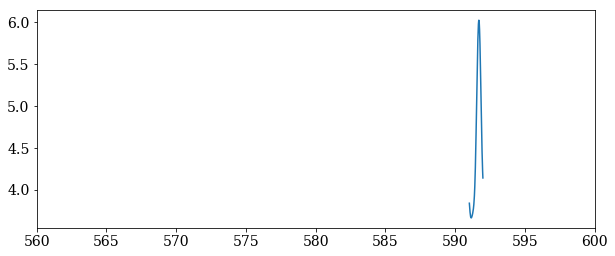

In [177]:
plt.figure(figsize=(10,4))
plt.plot(xx[(xx>565)&(xx<592)],mean_spectrum[(xx>565)&(xx<592)])
plt.xlim(560,600)

(565, 590)

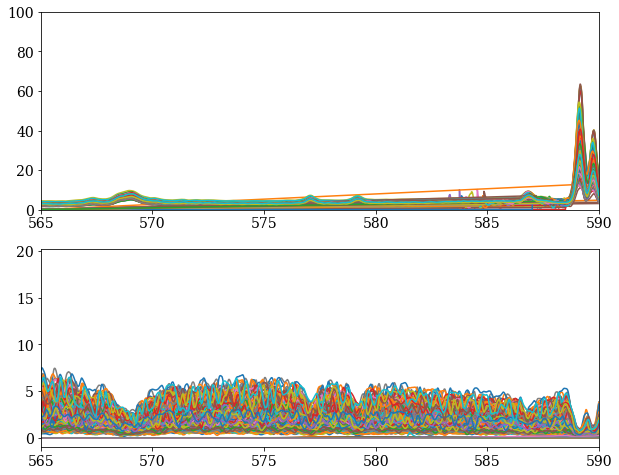

In [172]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,8))
for i, sky in enumerate(SKY):
    ax1.plot(xx, sky)
    ax2.plot(xx, VAR[i])
ax1.set_ylim(0,100)
ax1.set_xlim(565,590)
ax2.set_xlim(565,590)

(560, 600)

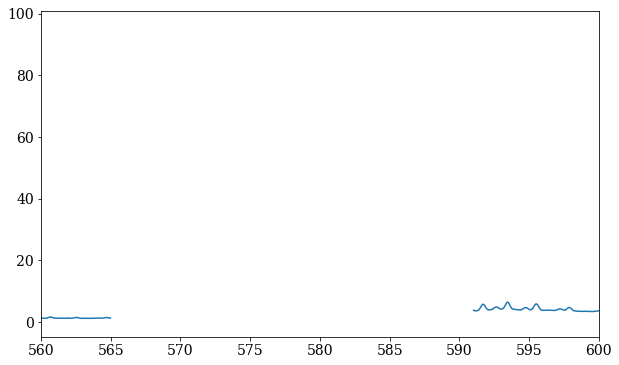

In [37]:
data = np.load('/global/cscratch1/sd/parkerf/dark_boss_sky/calibrated_sky/5981_calibrated_sky.npy')
meta = pd.read_csv('/global/cscratch1/sd/parkerf/dark_boss_sky/raw_meta/5981_raw_meta.csv')

In [40]:
specno = np.array(meta[meta.IMG == 156794].SPECNO)
this_data = data[specno]

In [ ]:
xx = np.linspace(300, 1040, (1040-300)*100)

In [180]:
MEAN_SPEC = []
MEAN_VAR = []
for img in np.unique(zenith.IMG):
    plate = list(zenith[zenith.IMG == img].PLATE)[0]
    data = np.load('/global/cscratch1/sd/parkerf/dark_boss_sky/calibrated_sky/%d_calibrated_sky.npy'%plate)
    meta = pd.read_csv('/global/cscratch1/sd/parkerf/dark_boss_sky/raw_meta/%d_raw_meta.csv'%plate)
    specno = np.array(meta[meta.IMG == img].SPECNO)
    this_data = data[specno]
    SKY = []
    VAR = []
    for d in this_data:
        try:
            df = d[(~np.isnan(d['SKY']))&(d['IVAR']>0)&(~np.isnan(d['IVAR']))]
            f = interp1d(df['WAVE'], df['SKY'], bounds_error=False, fill_value=0)
            g = interp1d(df['WAVE'], df['IVAR'], bounds_error=False, fill_value=0)
            SKY.append(f(xx))
            VAR.append(g(xx))
        except:
            pass
    MEAN_SPEC.append(np.ma.average(np.array(SKY),axis=0,weights=np.array(VAR)))
    MEAN_VAR.append(np.ma.average(np.array(VAR),axis=0))

In [186]:
MS = []
for i, s in enumerate(np.array(MEAN_SPEC)):
    x =pd.Series(s).interpolate(method='linear')
    MS.append(x)
mean_zenith = np.ma.average(MS,axis=0, weights=np.array(MEAN_VAR))

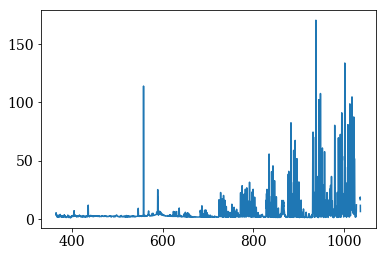

In [187]:
plt.plot(xx,mean_zenith)

365
586
586
807
807
1028


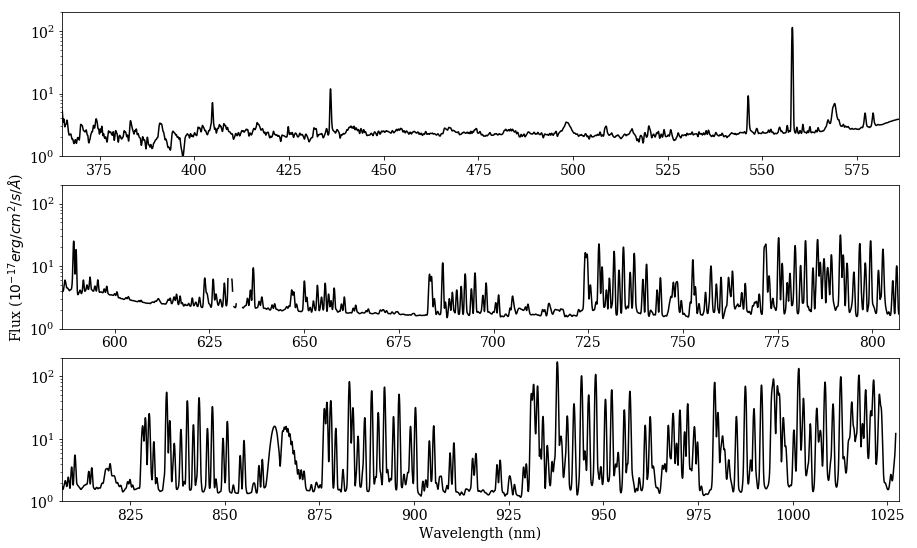

In [202]:
aa = int((1030-365)/3)
fig, axarr = plt.subplots(3,1,figsize = (15,9))
ax = axarr.ravel()
fig.add_subplot(111, frameon=False)
for i in range(3):
    ax[i].semilogy(xx, mean_zenith,'k-')
    start = 365+aa*(i)
    end = 365+aa*(i+1)
    print(start)
    print(end)
    ax[i].set_xlim(start,end)
    ax[i].set_ylim(pow(10,0),200)
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.ylabel("Flux ($10^{-17} erg/cm^{2}/s/\AA$)")
plt.xlabel("Wavelength (nm)")